 Bike Dataset. 

 instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

 
Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

Load packages and data

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')
graph_params = {'legend.fontsize': 'large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}

plt.rcParams.update(graph_params)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
bs_h = pd.read_csv('hour.csv')
#bs_d =pd.read_csv('day.csv')

In [4]:
bs_h.head(7)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           1  0.22  0.2727  0.80     0.0000       8          32   40  
2           1  0.22  0.2727  0.80     0.0000       5          27   32  
3           1  0.24  0.2879  0.75     0.0000       3          10   13  
4           1  0.24  0.2879  0.75     0.0000       0           1    1  
5           2  0.24  0.2576  0.75     0.0896       0           1    1  
6           1  0.22  0.2727  0.80     0.0000       2           0    2

Both datast has the same information except one is hourly basis and other is daily basis. 

Perform Explanatory Data Analysis

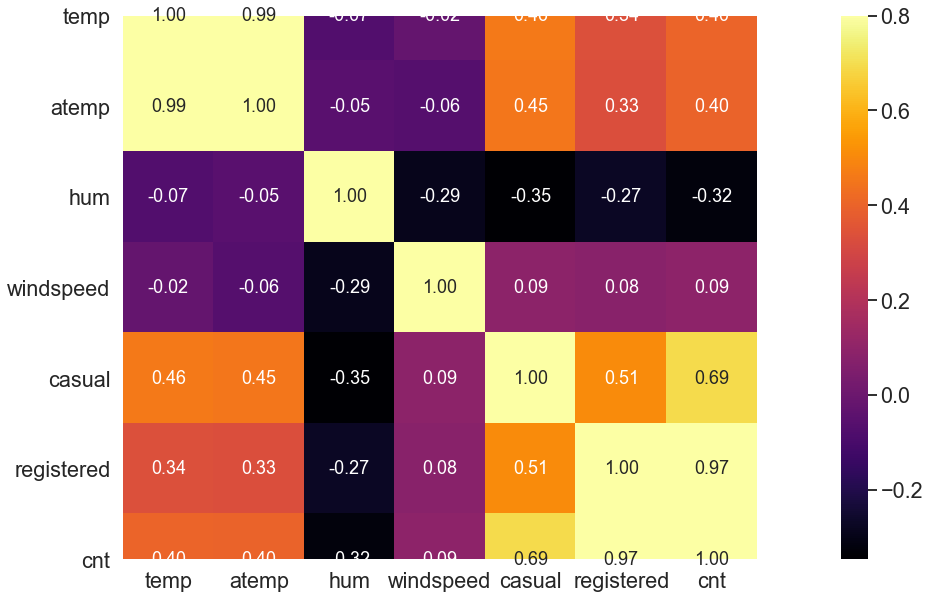

In [22]:
# Lets find correlation in the dataset 
#temp, atemp, humidity (hum), windspeed, casual, registered and count (cnt)
corr = bs_h[['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(corr,vmax=.8, cmap='inferno', fmt=".2f", square=True,annot=True)
plt.show()

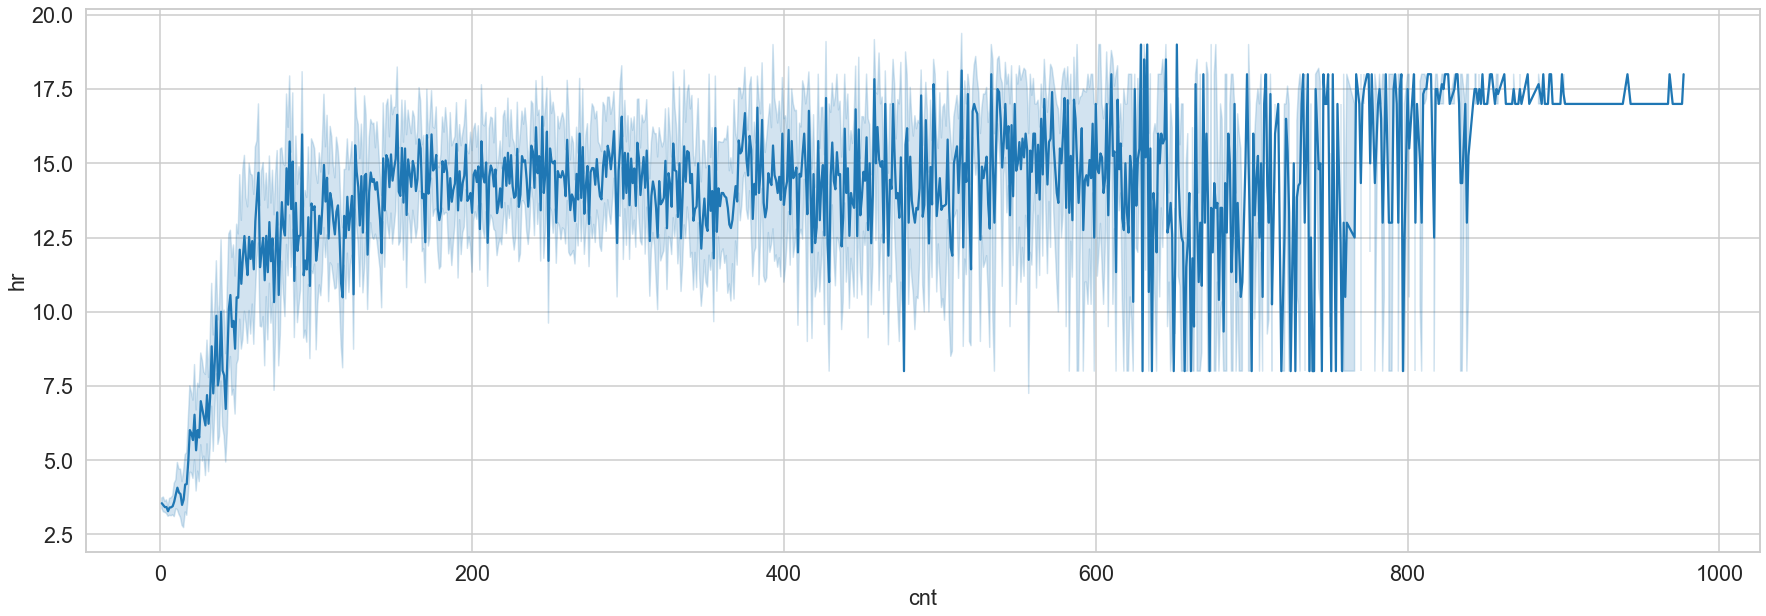

In [23]:
sns.lineplot(x="cnt", y="hr", data=bs_h)
plt.show()

This indicates number of bike count increases after 12PM

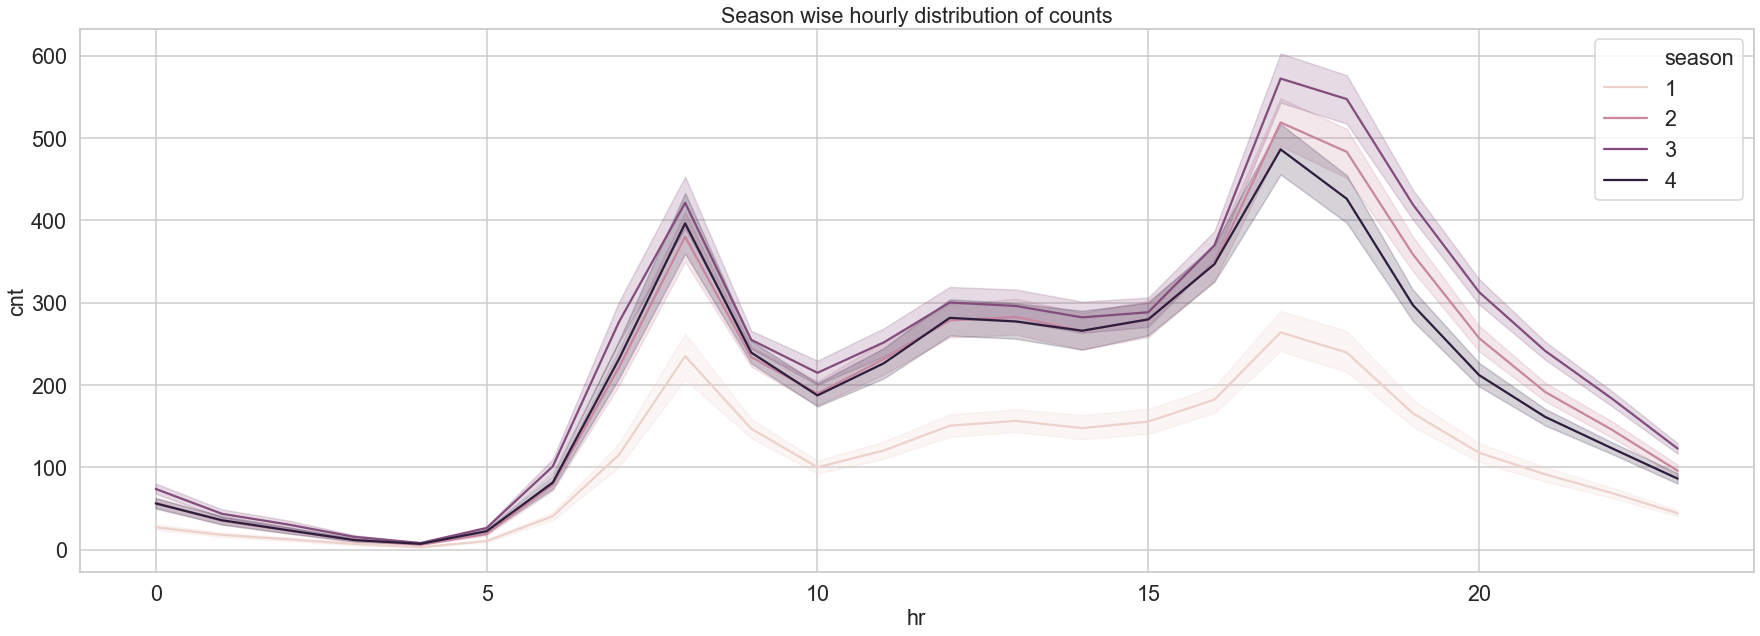

In [24]:
fig,ax = plt.subplots()
sns.lineplot(data=bs_h[['hr','cnt','season']],x='hr',y='cnt',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

[Text(0.5, 1.0, 'Weather Condition baseded monthly distribution of counts')]

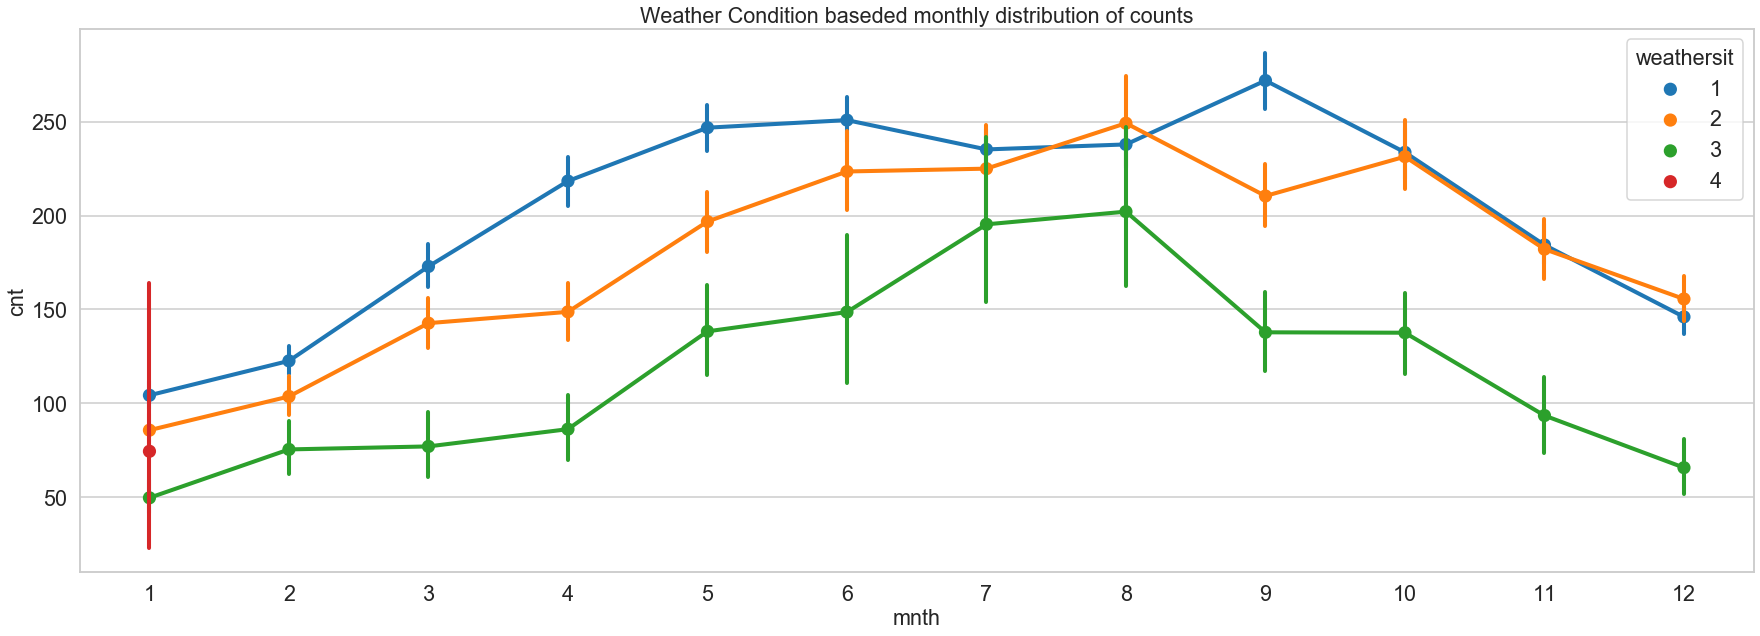

In [55]:
fig,ax = plt.subplots()
sns.pointplot(data=bs_h[['mnth','cnt','weathersit']],x='mnth',y='cnt',hue='weathersit',ax=ax)
ax.set(title="Weather Condition baseded monthly distribution of counts")

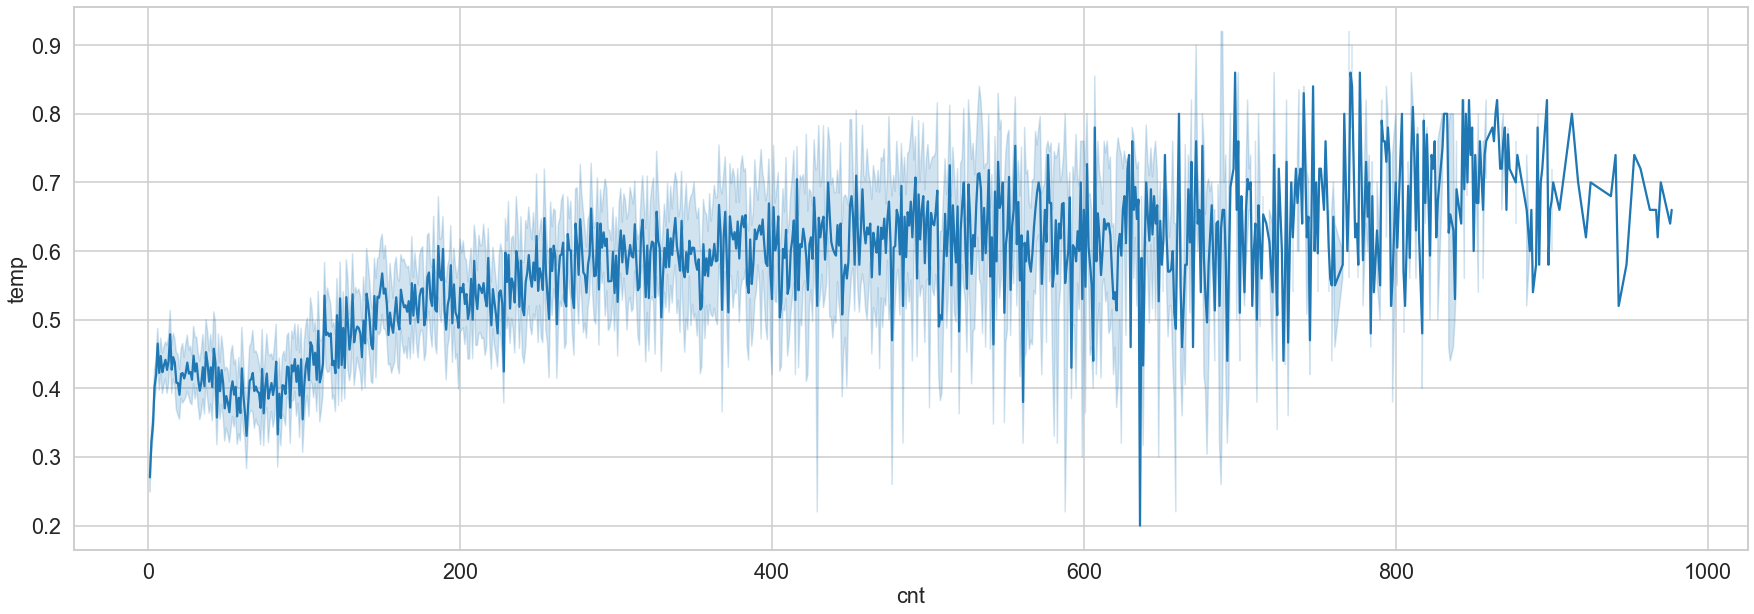

In [56]:
sns.lineplot(x="cnt", y="temp", data=bs_h)
plt.show()

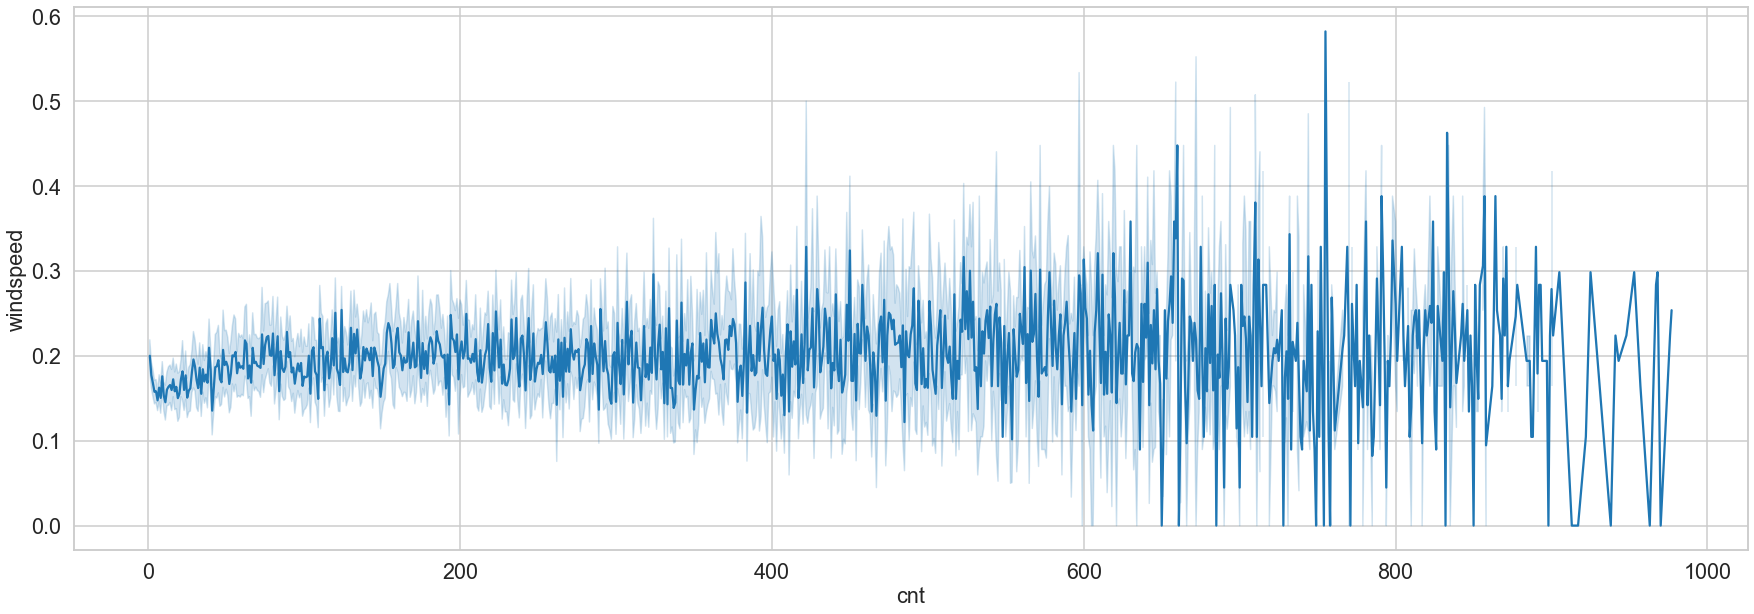

In [57]:
sns.lineplot(x="cnt", y="windspeed", data=bs_h) # When wind speed is low or below 0.3 bikes are in demand.
plt.show()

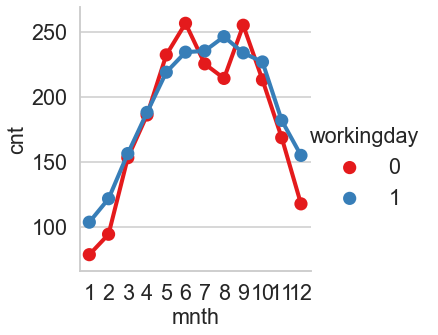

In [58]:
# Lets plot which month has more count of bikes 
sns.factorplot('mnth','cnt',hue='workingday',data=bs_h, ci=None, palette='Set1')
plt.show()

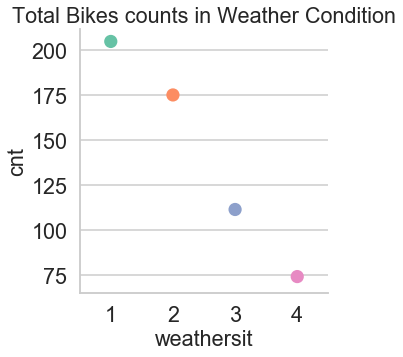

In [59]:
# Lets plot total number of bikes wrt to weather conditions 
sns.factorplot('weathersit','cnt',hue='weathersit',data=bs_h, ci=None, palette='Set2')
plt.title('Total Bikes counts in Weather Condition') # Highest count observed in clear weather followed by misty and cloudy. 
plt.show()

Text(0.5, 1.0, 'Year distribution of counts')

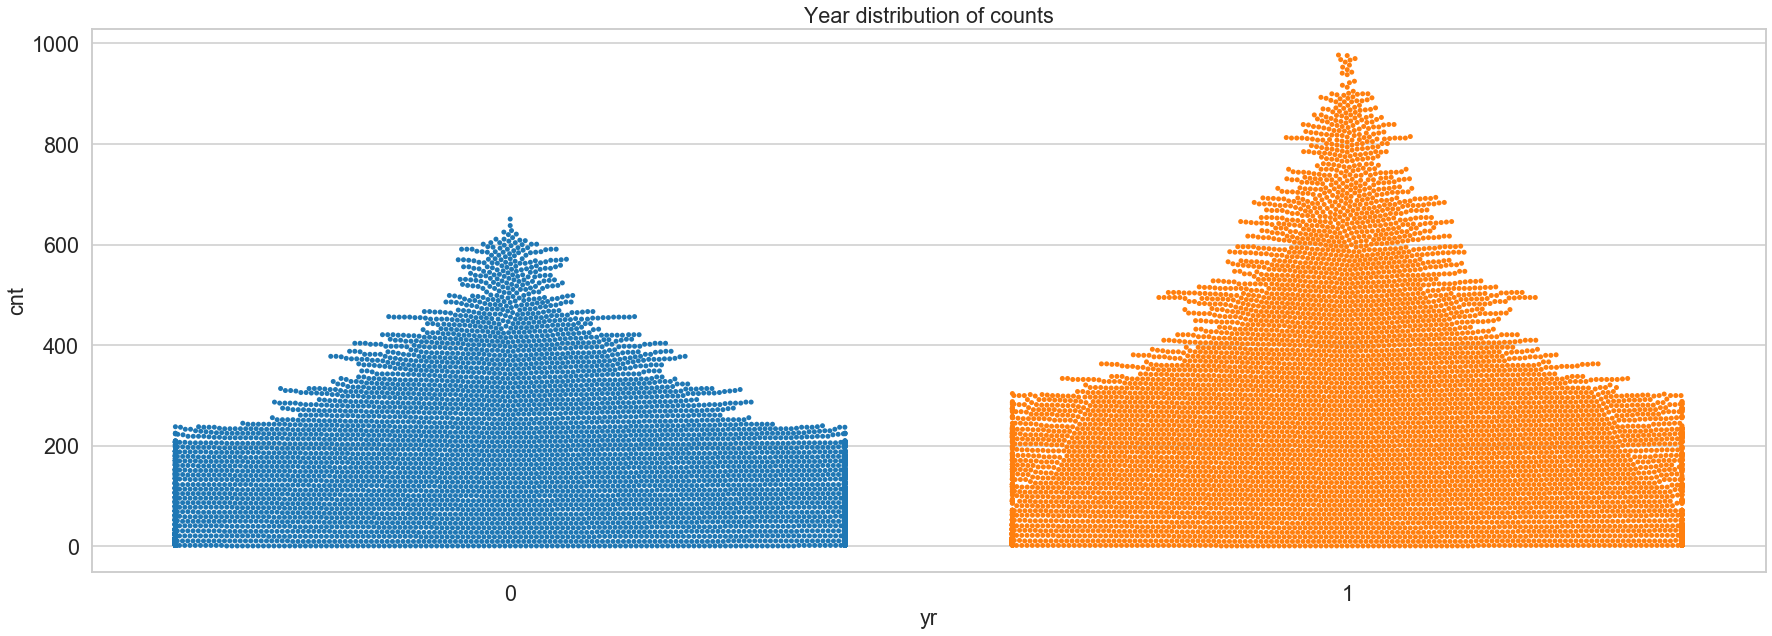

In [60]:
sns.swarmplot(data=bs_h[['yr','cnt']],x='yr',y='cnt')
plt.title("Year distribution of counts") 

#Total bike sharing count more in 2012

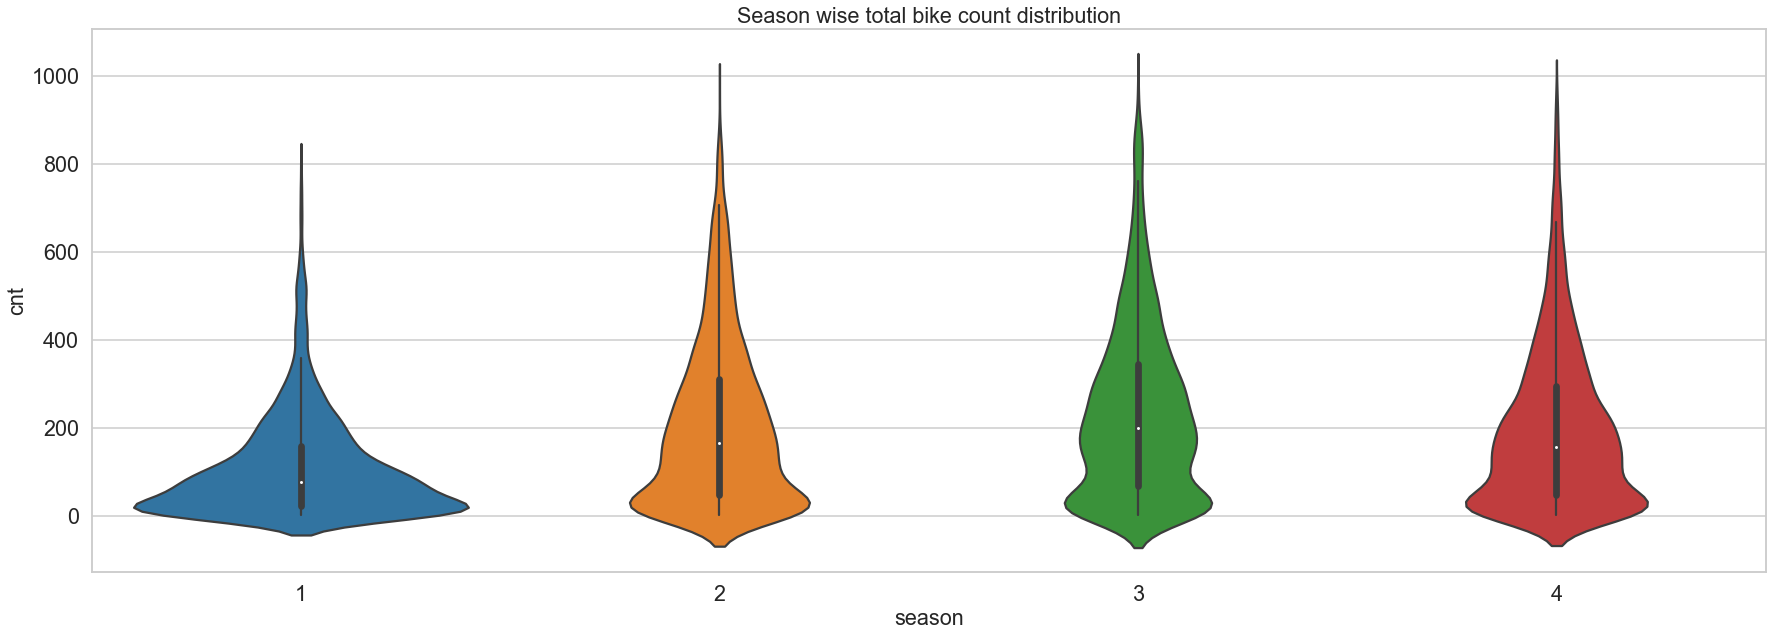

In [61]:
sns.violinplot(data=bs_h[['season','cnt']],x='season',y='cnt')
plt.title('Season wise total bike count distribution')
plt.show()
# Below graph shows tatal bike count more in winter (1).

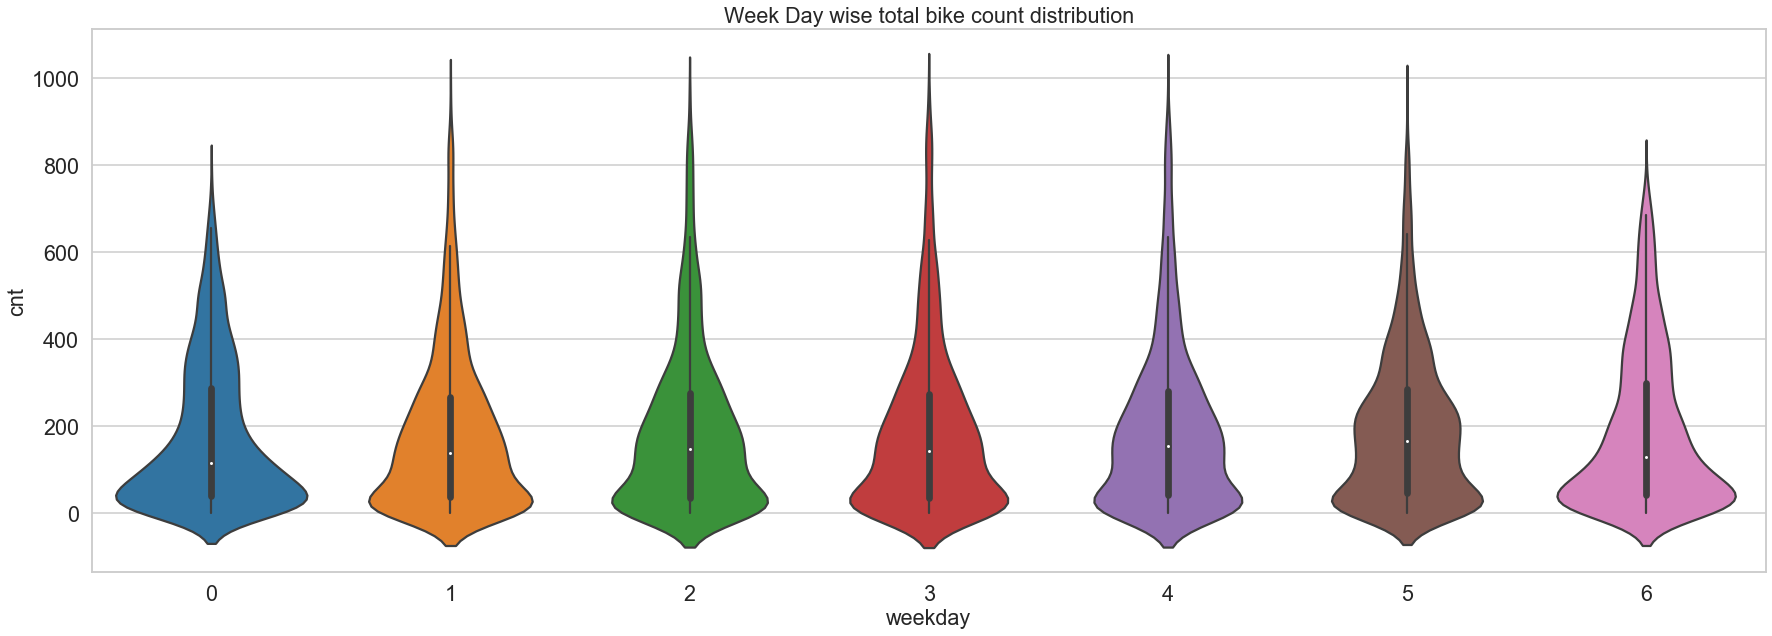

In [62]:
sns.violinplot(data=bs_h[['weekday','cnt']],x='weekday',y='cnt')
plt.title('Week Day wise total bike count distribution')
plt.show()
# Below graph shows tatal bike count relatively more 0th and 6th day of the week.

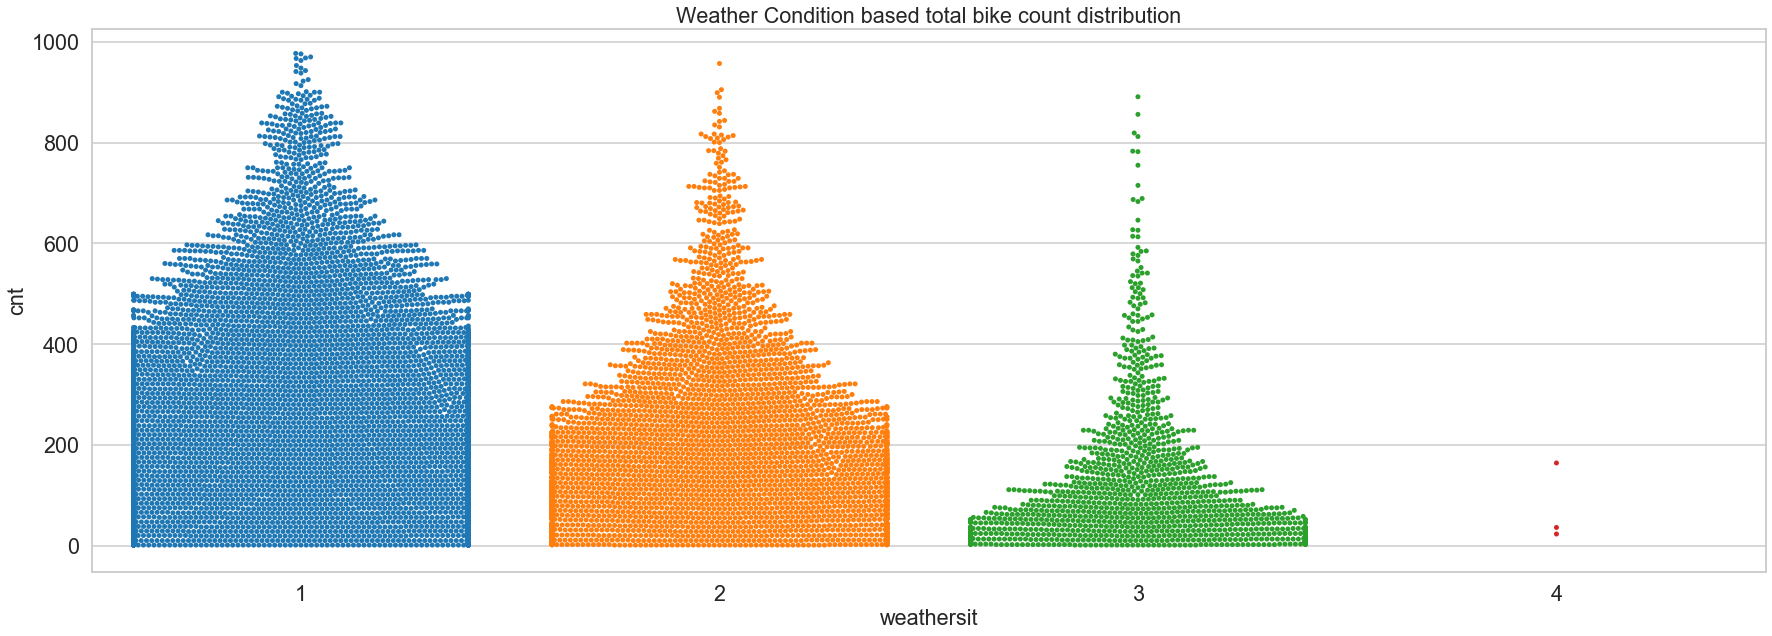

In [63]:
sns.swarmplot(data=bs_h[['weathersit','cnt']],x='weathersit',y='cnt')
plt.title('Weather Condition based total bike count distribution')
plt.show()
# Total bike count is almost negligible when weather condition is 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
# Bikes count is very high when weather is clear and less bothering. 

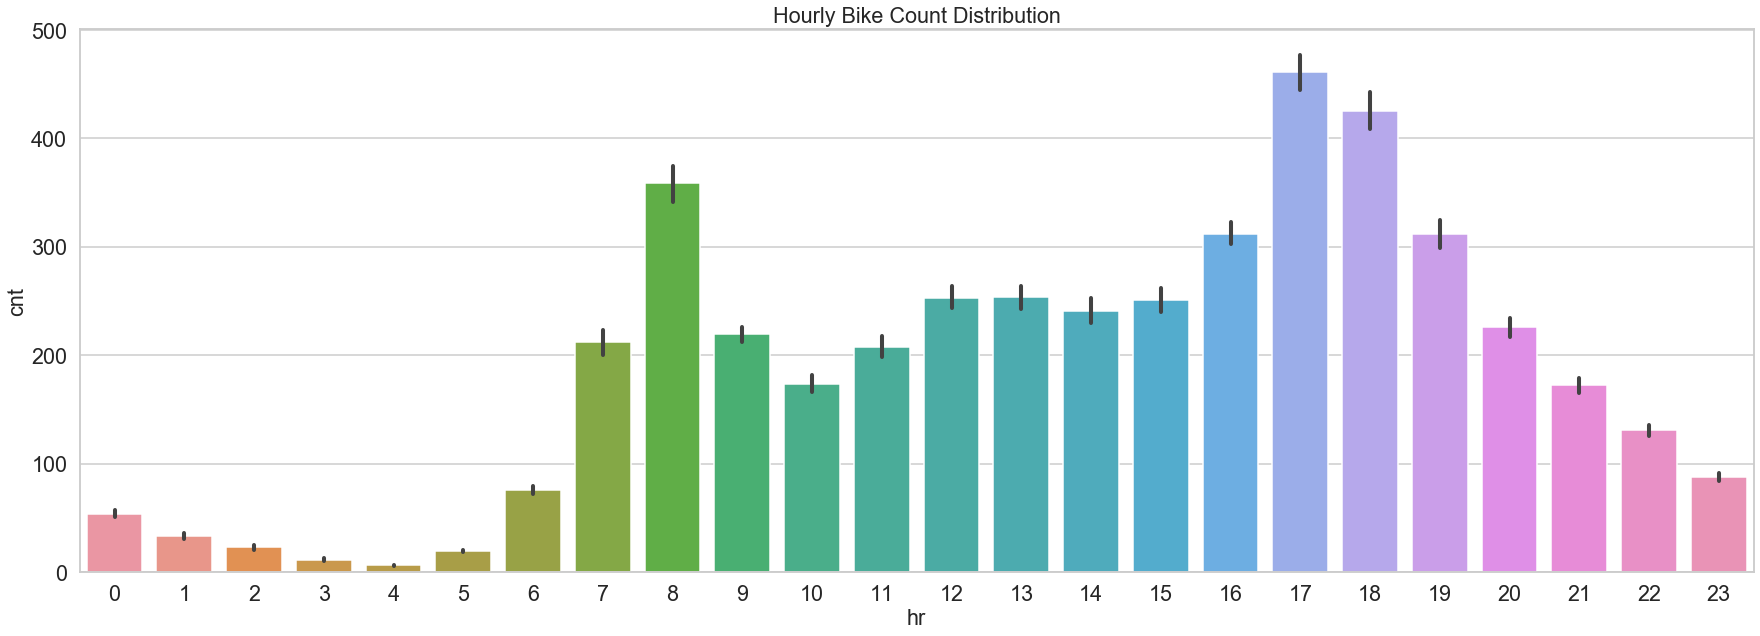

In [64]:
# Lets see total bike count hourly basis. 
sns.barplot(data=bs_h[['hr','cnt']],x='hr',y='cnt')
plt.title("Hourly Bike Count Distribution")
plt.show()

Lets analysis the outliers in the Bike dataset

In [66]:
bs_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

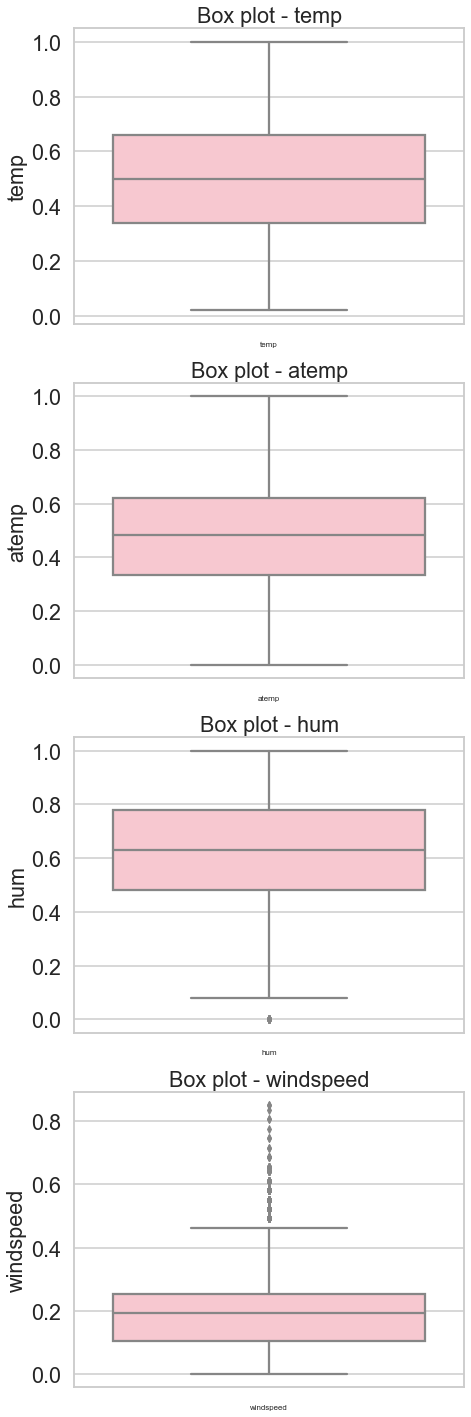

In [65]:
# Visualize outliers using BoxPlot
col = ['temp', 'atemp', 'hum', 'windspeed']
fig, ax = plt.subplots(len(col), figsize=(7,25))

for i, col_val in enumerate(col):

    sns.boxplot(y=bs_h[col_val], ax=ax[i], color='pink')
    ax[i].set_title('Box plot - {}'.format(col_val))
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()  # We found outlier in humidity and windspeed

In [25]:
#Lets prepare dataset for the model fitting 
# Drop some irrelevent features that are not contributing enough information
_bs=bs_h.drop(['instant','dteday','casual','registered', 'weekday'], axis=1)
_bs.head() 

season  yr  mnth  hr  holiday  workingday  weathersit  temp   atemp   hum  \
0       1   0     1   0        0           0           1  0.24  0.2879  0.81   
1       1   0     1   1        0           0           1  0.22  0.2727  0.80   
2       1   0     1   2        0           0           1  0.22  0.2727  0.80   
3       1   0     1   3        0           0           1  0.24  0.2879  0.75   
4       1   0     1   4        0           0           1  0.24  0.2879  0.75   

   windspeed  cnt  
0        0.0   16  
1        0.0   40  
2        0.0   32  
3        0.0   13  
4        0.0    1

In [26]:
# # Season and weathershit are catogorical variables. 
season=pd.get_dummies(_bs['season'],prefix='season')
_bs1=pd.concat([_bs,season],axis=1)
_bs1.head()

season  yr  mnth  hr  holiday  workingday  weathersit  temp   atemp   hum  \
0       1   0     1   0        0           0           1  0.24  0.2879  0.81   
1       1   0     1   1        0           0           1  0.22  0.2727  0.80   
2       1   0     1   2        0           0           1  0.22  0.2727  0.80   
3       1   0     1   3        0           0           1  0.24  0.2879  0.75   
4       1   0     1   4        0           0           1  0.24  0.2879  0.75   

   windspeed  cnt  season_1  season_2  season_3  season_4  
0        0.0   16         1         0         0         0  
1        0.0   40         1         0         0         0  
2        0.0   32         1         0         0         0  
3        0.0   13         1         0         0         0  
4        0.0    1         1         0         0         0

In [27]:
weather=pd.get_dummies(_bs1['weathersit'],prefix='weathersit')
_bs1=pd.concat([_bs1,weather],axis=1)
_bs1.head(10)

season  yr  mnth  hr  holiday  workingday  weathersit  temp   atemp   hum  \
0       1   0     1   0        0           0           1  0.24  0.2879  0.81   
1       1   0     1   1        0           0           1  0.22  0.2727  0.80   
2       1   0     1   2        0           0           1  0.22  0.2727  0.80   
3       1   0     1   3        0           0           1  0.24  0.2879  0.75   
4       1   0     1   4        0           0           1  0.24  0.2879  0.75   
5       1   0     1   5        0           0           2  0.24  0.2576  0.75   
6       1   0     1   6        0           0           1  0.22  0.2727  0.80   
7       1   0     1   7        0           0           1  0.20  0.2576  0.86   
8       1   0     1   8        0           0           1  0.24  0.2879  0.75   
9       1   0     1   9        0           0           1  0.32  0.3485  0.76   

   windspeed  cnt  season_1  season_2  season_3  season_4  weathersit_1  \
0     0.0000   16         1         0         0         0             1   
1     0.0000   40         1         0         0         0             1   
2     0.0000   32         1         0         0         0             1   
3     0.0000   13         1         0         0         0             1   
4     0.0000    1         1         0         0         0             1   
5     0.0896    1         1         0         0         0             0   
6     0.0000    2         1         0         0         0             1   
7     0.0000    3         1         0         0         0             1   
8     0.0000    8         1         0         0         0             1   
9     0.0000   14         1         0         0         0             1   

   weathersit_2  weathersit_3  weathersit_4  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  
5             1             0             0  
6             0             0             0  
7             0             0             0  
8             0             0             0  
9             0             0             0

In [28]:
feature_bs=_bs.drop(['cnt', 'season', 'weathersit'], axis=1)
outcome_bs=_bs['cnt']
print(feature_bs.shape)
print(outcome_bs.shape)

(17379, 9)
(17379,)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_bs, outcome_bs, test_size=0.25,random_state=42)

In [52]:
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, roc_curve, auc, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

SVR=SVR()
RandomForestRegressor=RandomForestRegressor()
DecisionTreeRegressor=DecisionTreeRegressor()
GaussianNB=GaussianNB()
KNeighborsRegressor=KNeighborsRegressor()
AdaBoostRegressor=AdaBoostRegressor()
LinearRegression=LinearRegression()

# Build models
models = []
models.append(('SupportVectorRegressor', SVR))
models.append(('Random Forest', RandomForestRegressor))
models.append(('Decision Tree', DecisionTreeRegressor))
models.append(('GaussianNB', GaussianNB))
models.append(('KNeighbors', KNeighborsRegressor))
models.append(('AdaBoost', AdaBoostRegressor))
models.append(('Logistic Regression', LinearRegression))

***************************** SupportVectorRegressor ******************************************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R^2: 0.36147141765232316
MAE: 91.63292735796398
MSE: 20534.00110682801
RMSE: 143.29689845501895


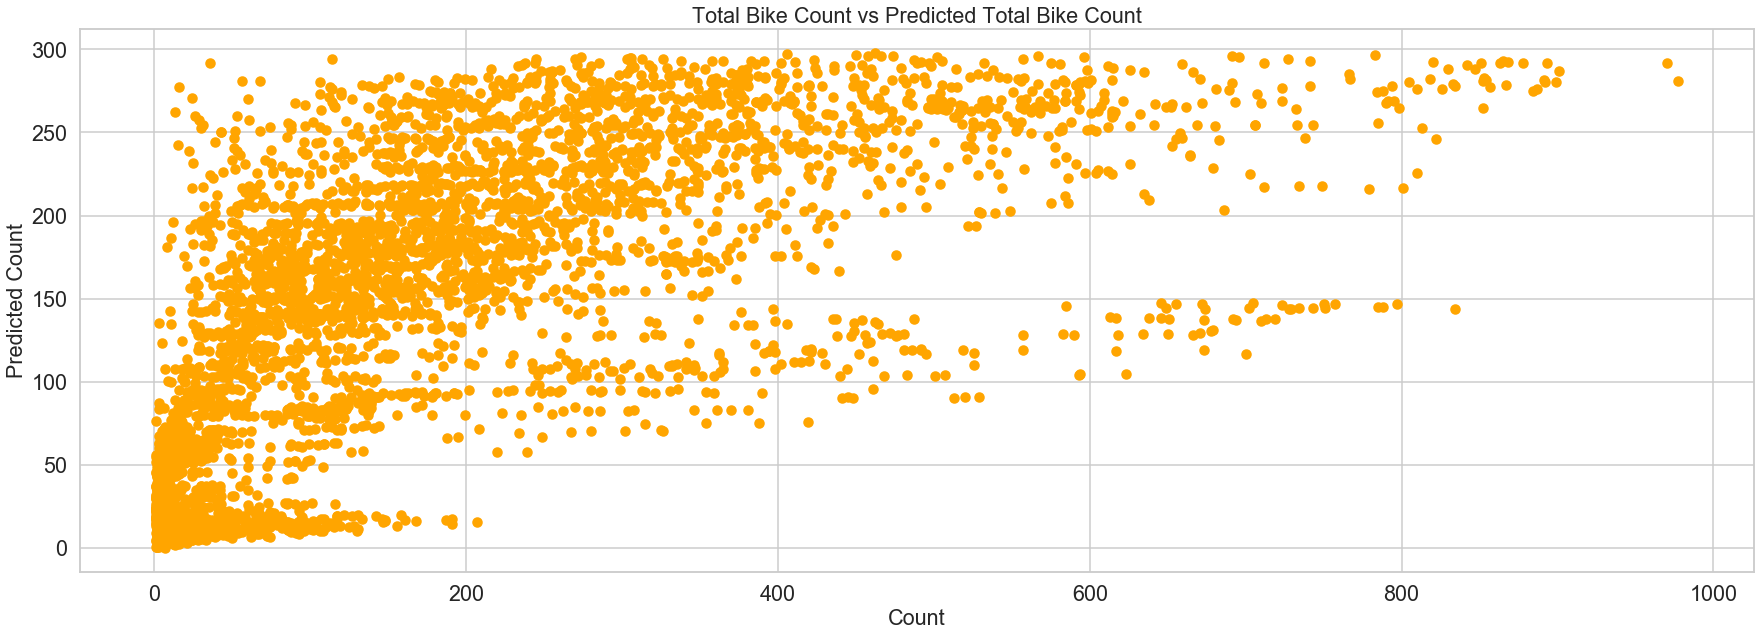

Mean Cross Validation Score of Model: 0.35190627420415344


***************************** Random Forest ******************************************


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


R^2: 0.9202713833992241
MAE: 30.54938643761302
MSE: 2563.9376948591744
RMSE: 50.635340374674826


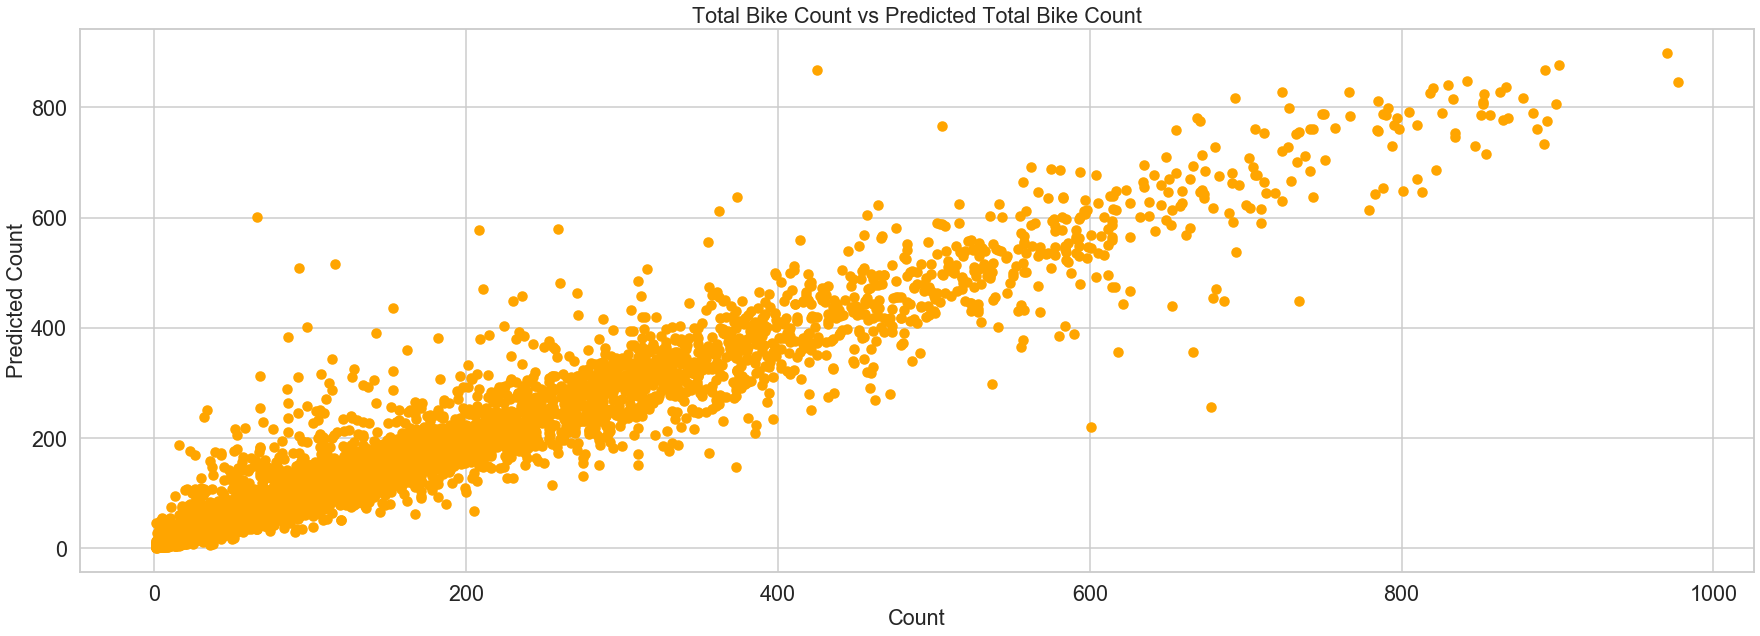

Mean Cross Validation Score of Model: 0.9232738973738949


***************************** Decision Tree ******************************************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R^2: 0.8687063338946088
MAE: 39.65155350978136
MSE: 4222.182623705408
RMSE: 64.97832426052098


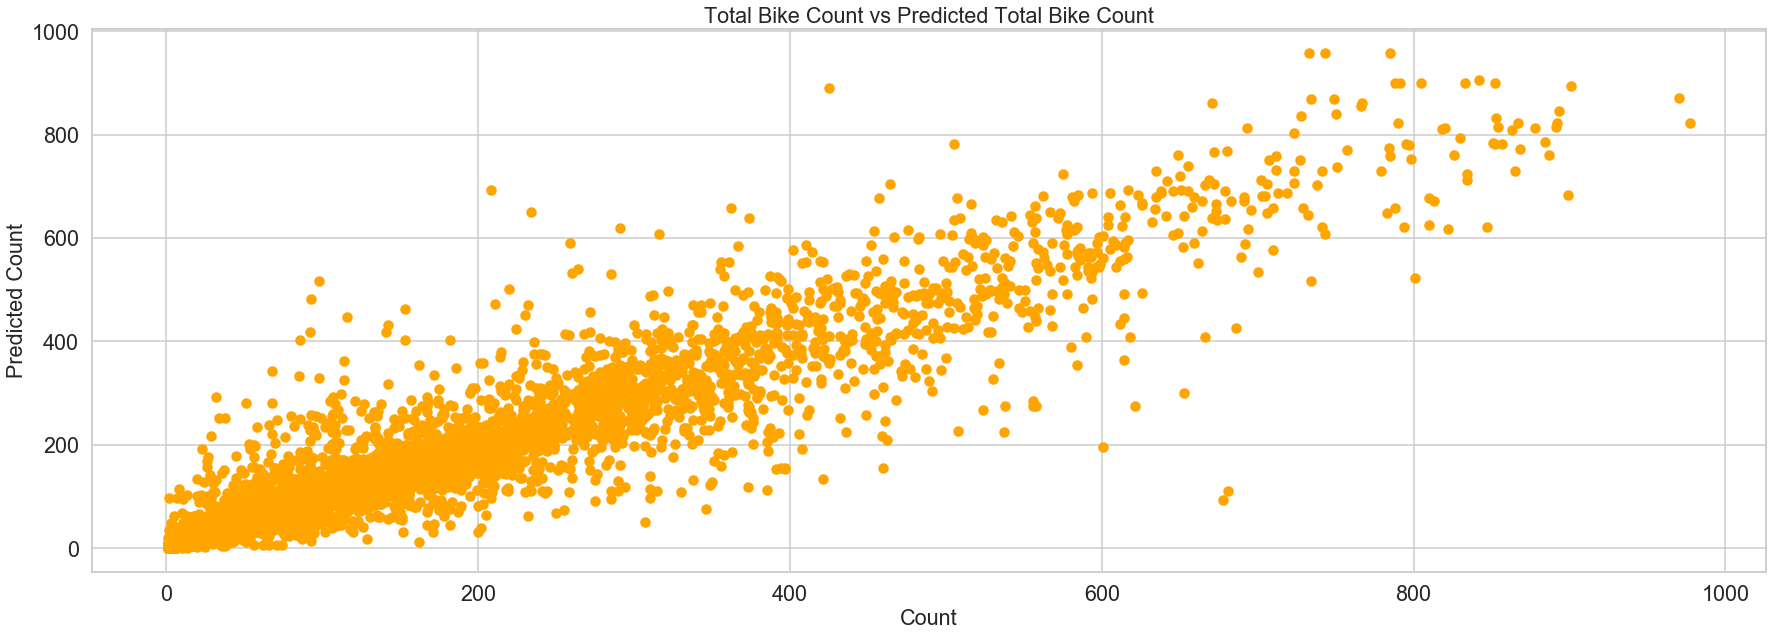

Mean Cross Validation Score of Model: 0.8628439360018622


***************************** GaussianNB ******************************************


GaussianNB(priors=None, var_smoothing=1e-09)


R^2: -3.3084066232485307
MAE: 321.15995397008055
MSE: 138551.0826237054
RMSE: 372.22450567326354


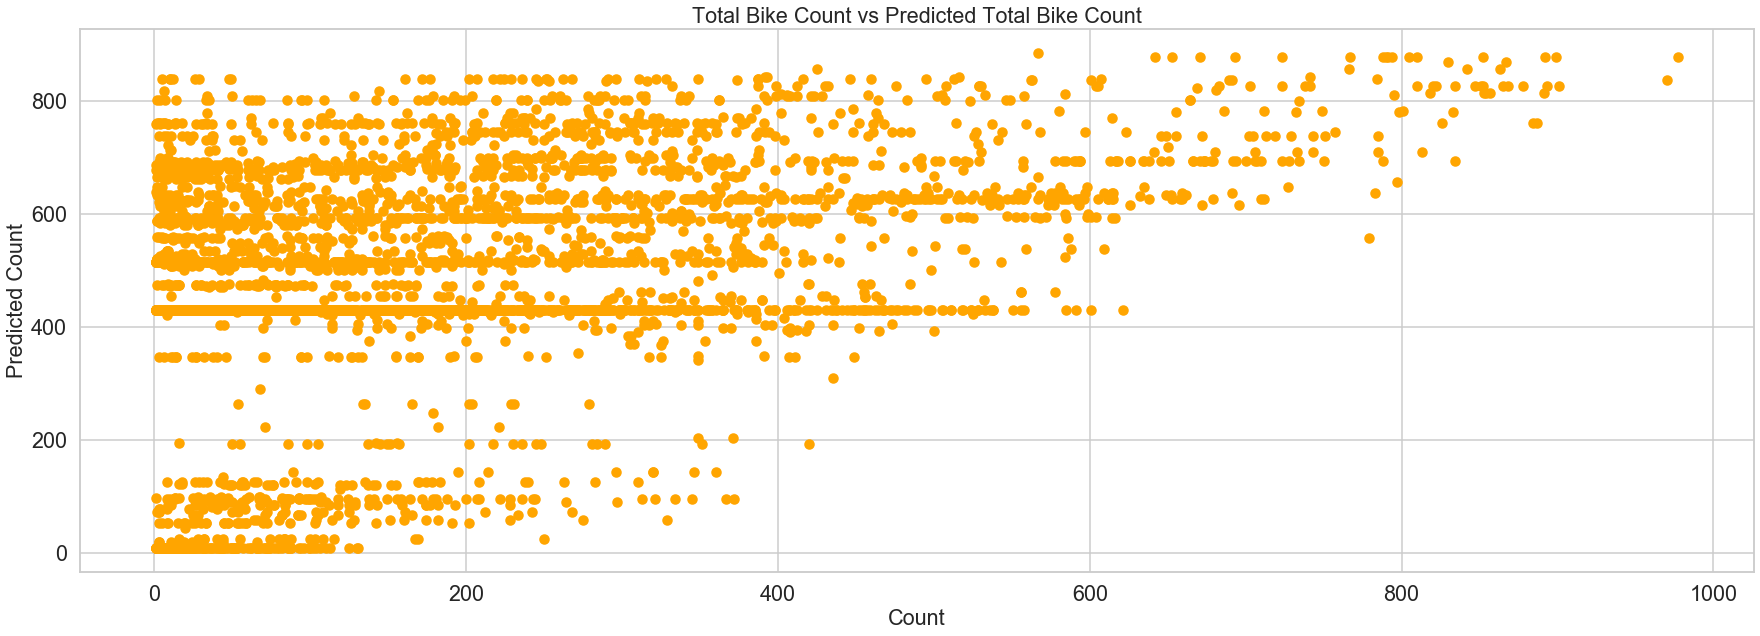

Mean Cross Validation Score of Model: -3.150012697348525


***************************** KNeighbors ******************************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R^2: 0.877306680217925
MAE: 37.30269275028768
MSE: 3945.6100069044874
RMSE: 62.81409083083578


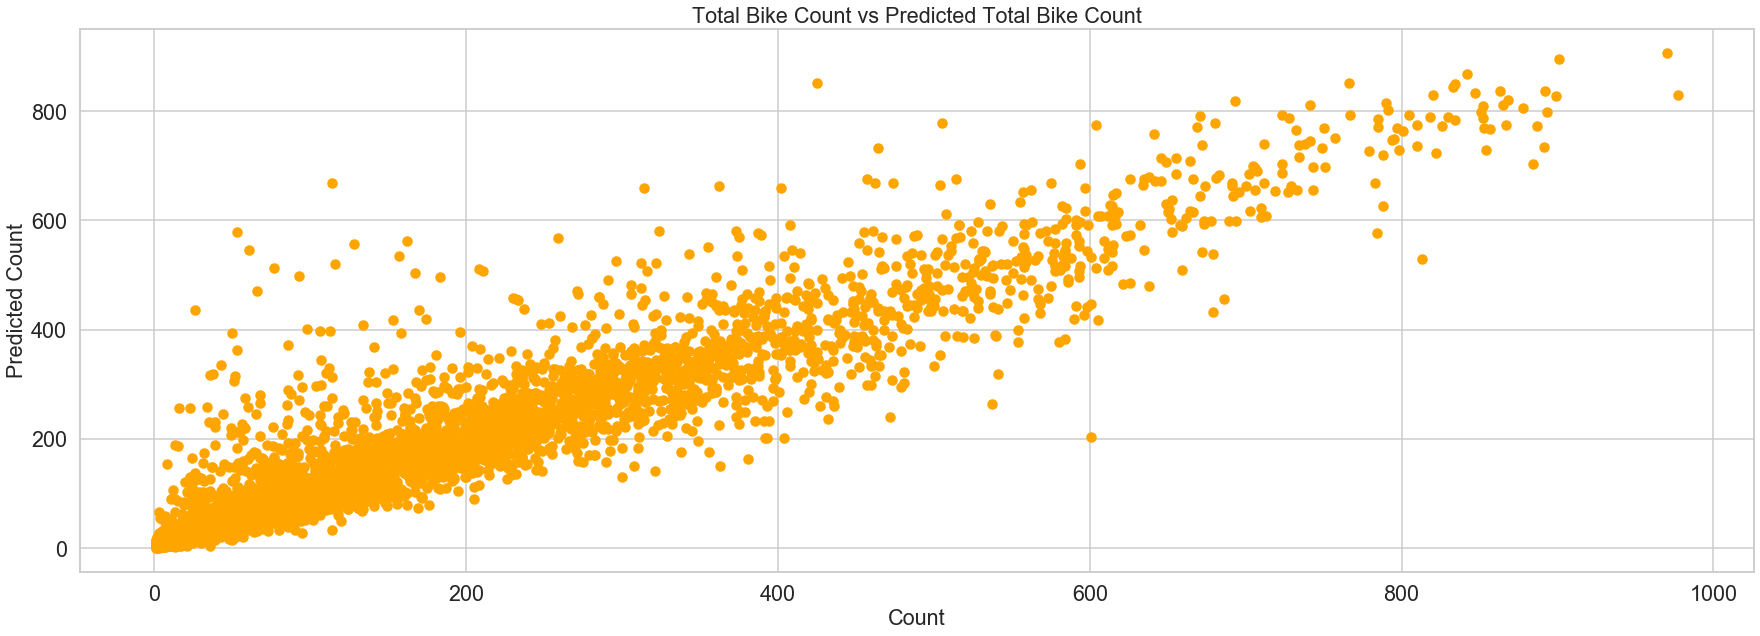

Mean Cross Validation Score of Model: 0.8735437351472021


***************************** AdaBoost ******************************************


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)


R^2: 0.6623836113802745
MAE: 84.46762215478607
MSE: 10857.173021310318
RMSE: 104.19775919524525


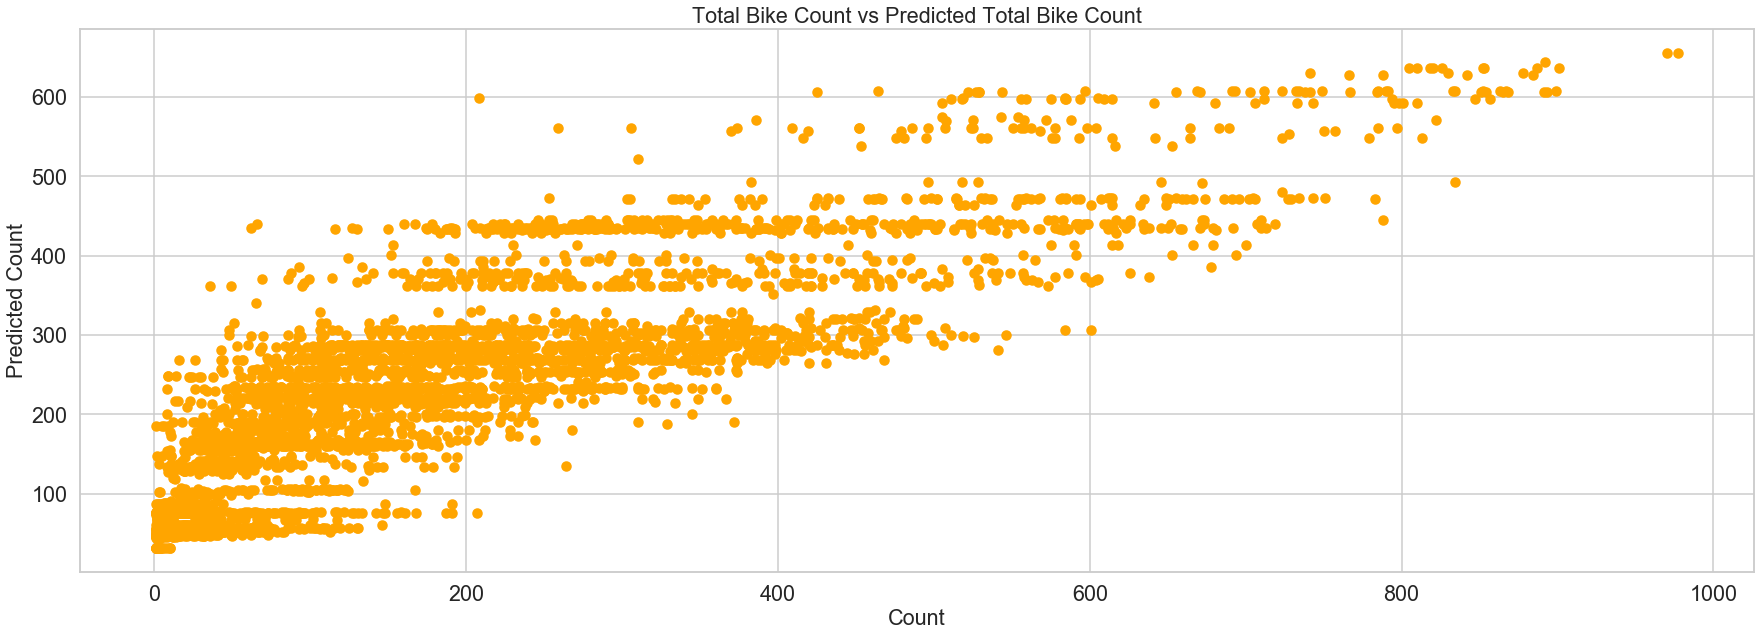

Mean Cross Validation Score of Model: 0.6561298042822631


***************************** Logistic Regression ******************************************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R^2: 0.3798579252409183
MAE: 105.93772303345825
MSE: 19942.722066840823
RMSE: 141.21870296402253


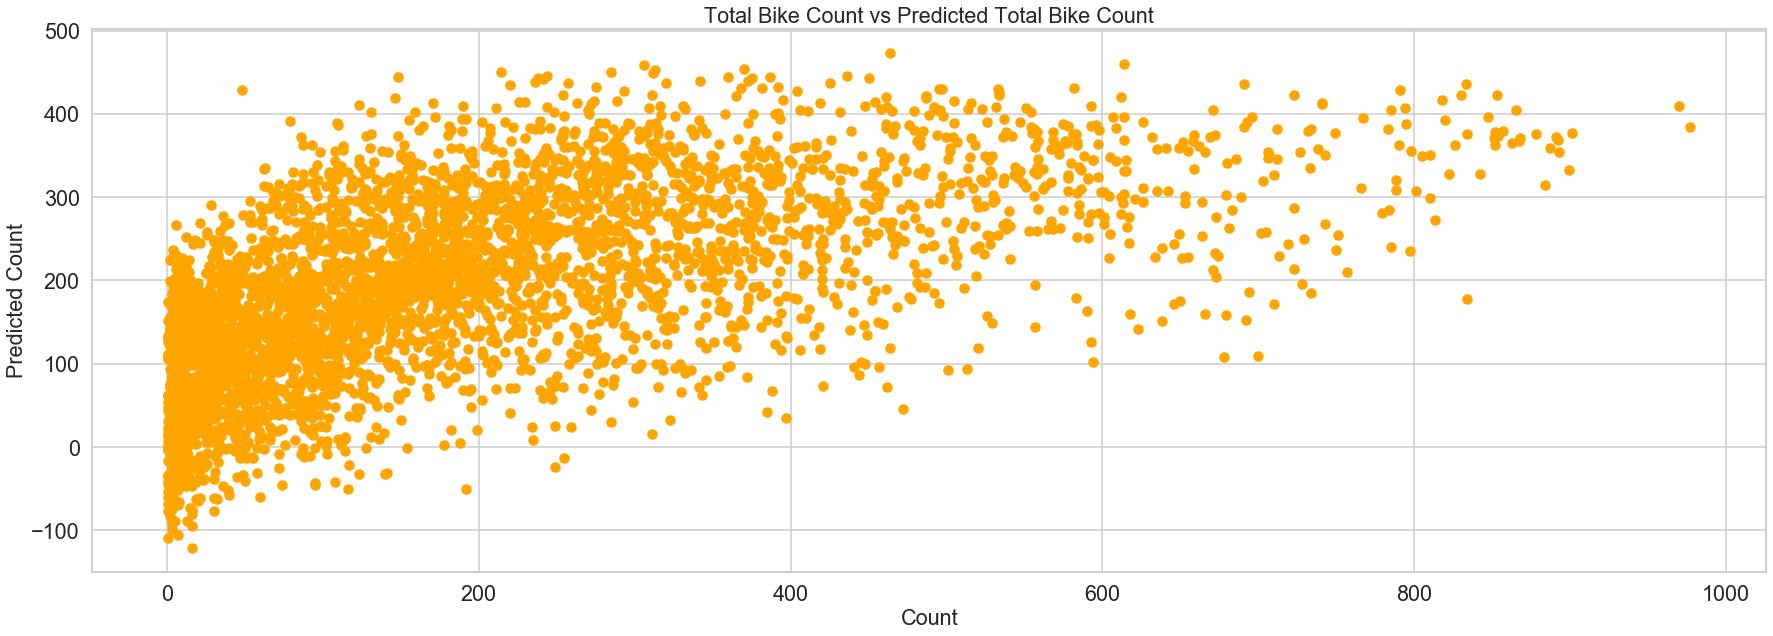

Mean Cross Validation Score of Model: 0.38300443798094297




In [53]:
results = []
Model = []
for name,model in models:
    print('*****************************', name, '******************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred = model.predict(x_test)
    print('\n')
    
    
    # Model Evaluation
    print('R^2:',metrics.r2_score(y_test, y_pred))
    print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:',metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    
    # Visualizing the differences between actual total bike count and predicted total bike count
    plt.scatter(y_test, y_pred, color='orange')
    plt.xlabel("Count")
    plt.ylabel("Predicted Count")
    plt.title("Total Bike Count vs Predicted Total Bike Count")
    plt.show()
    
    # Cross Validation of the model performance
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "r2").mean()
    print("Mean Cross Validation Score of Model:",cv_result)
    results.append(cv_result*100)
    print('\n')

In [54]:
# Lastly Save the model for futher use. Here we have considered RandomForest Regressor it is outperformed as comapred to other 
# Regressor techniques. There is no probelm of underfitting and over fitting in the regressor varified by 10 fold validation. 
from sklearn.externals import joblib
joblib.dump(RandomForestRegressor, 'Bike_Count.pkl')

['Bike_Count.pkl']